In [1]:
print("sex and candy")
i=3

sex and candy


In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH=os.path.join("datasets","housing")
print ("HOUSING_PATH="+HOUSING_PATH)
HOUSING_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

HOUSING_PATH=datasets/housing


In [3]:
fetch_housing_data()

In [10]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [11]:
housing=load_housing_data()
housing=housing.drop("total_bedrooms",axis=1)
housing=housing.drop("ocean_proximity",axis=1)

In [12]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20635    -121.09     39.48                25.0       1665.0       845.0   
20636    -121.21     39.49                18.0        697.0       356.0   
20637    -121.22     39.43                17.0       2254.0      1007.0   
20638    -121.32     39.43                18.0       1860.0       741.0   
20639    -121.24     39.37                16.0       2785.0      1387.0   

       households  median_income  median_house_value  
0           

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000


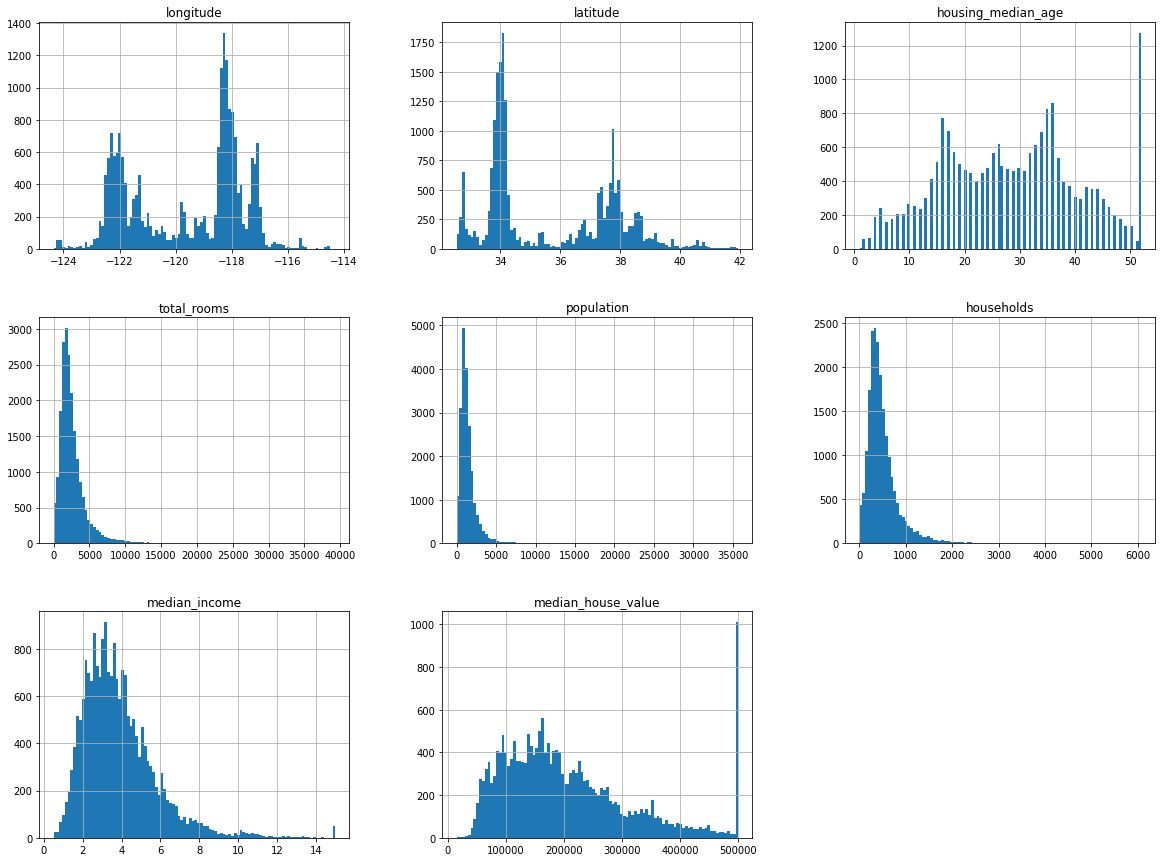

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(figsize=(20,15),bins=100)
plt.show()

<AxesSubplot:>

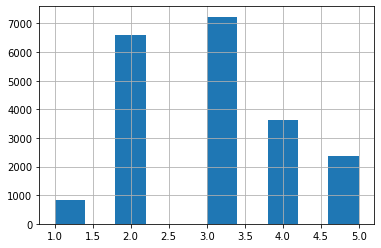

In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
housing_with_id2=housing.reset_index()
train_set,test_set=train_test_split(housing_with_id2,test_size=0.2,random_state=69)
#print(train_set)
#print (test_set)
housing["income_cat"]=pd.cut(housing["median_income"],
                            bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=69)
for train_index , test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

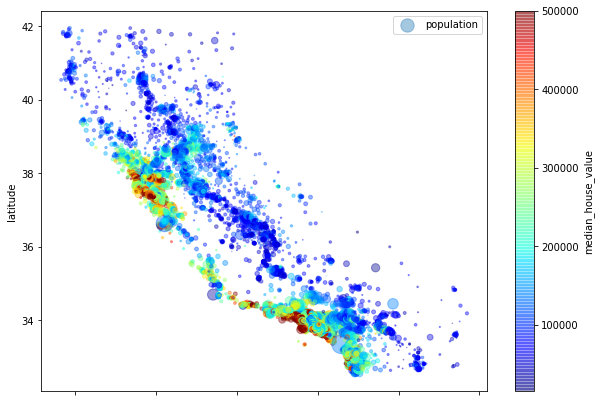

In [29]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",
             figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [31]:
corr_matrix=housing.corr()
print(corr_matrix["median_income"].sort_values(ascending=False))

median_income         1.000000
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64


In [32]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()
print(housing_labels)

503      119400.0
8185     287200.0
16672     42500.0
8673     427200.0
15098    143500.0
           ...   
15686    500001.0
19312    209500.0
6476     207200.0
13115    241100.0
925      264400.0
Name: median_house_value, Length: 16512, dtype: float64


In [35]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing,housing_labels)
#print(housing)
#print("")
#print(housing_labels)

LinearRegression()

In [41]:
from sklearn.pipeline import Pipeline

some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=housing[:5]
print("Predictions:",lin_reg.predict(some_data_prepared))
print("Labels", list(some_labels))

Predictions: [208593.61013527 303725.24072236 139504.86421784 283076.48999703
 130716.16185322]
Labels [119400.0, 287200.0, 42500.0, 427200.0, 143500.0]
